
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 2) </b> <a class="tocSkip"></a>

Hola Arturo nuevamente! Felicitaciones porque has corregido los detalles marcados en nuestra iteración anterior. Ahora si este proyecto está en total condiciones de ser aprobado, bien hecho!
    
Éxitos en tu camino dentro del mundo de los datos y saludos!

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>


Arturo, cuando hacemos análisis de datos es muy útil escribir una introducción al proyecto donde se especifiquen claramente los objetivos y se explique el propósito del mismo. Es esencial hacer esto para establecer las bases del proyecto y aclarar lo que buscamos alcanzar. Con la introducción, queda de manera clarar el análisis que desarrollaremos en el proyecto y cómo lo pretendemos abordar.</div>

## Análisis para Zuber: Afectación en el tráfico de viajes causado por cambios climáticos en la zona.

En este análisis vamos a revisar como la lluvia y otras afectaciones climáticas afectan el flujo en el que Zuber recibe viajes comparado con días despeajdos de cualquier condición climática.El objetivo es saber cuanto puede cambiar el comportamiento del flujo basado en días con malas condiciones climáticas.

In [1]:
pip install matplotlib #Instalar librerías para crear gráficos

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn #Instalar librería para gráficos

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy #Instalar librería par cálculos

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd #Importar librerías necesarias para trabajar
import numpy as np
from math import factorial
import plotly as plt
import matplotlib.pyplot as mplt
import seaborn as sns
from scipy.stats import ttest_ind

In [5]:
df = pd.read_csv('/datasets/project_sql_result_01.csv') #Importar información de archivos CSV
df_2 = pd.read_csv('/datasets/project_sql_result_04.csv')
df_3 = pd.read_csv('/datasets/project_sql_result_07.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [6]:
print(df.dtypes) #Revisamos los tipos de datos en nuestros DataFrames
print()
print(df_2.dtypes)
print()
print(df_3.dtypes)

company_name    object
trips_amount     int64
dtype: object

dropoff_location_name     object
average_trips            float64
dtype: object

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


In [7]:
df_3['start_ts'] = pd.to_datetime(df_3['start_ts']) #Convertimos el tipo de dato de las fechas de texto a formato fecha
print()
print(df_3.dtypes)


start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object


In [8]:
print(df.duplicated().sum()) #Checar por duplicados
print()
print(df_2.duplicated().sum())
print()
print(df_3.duplicated().sum())
print()
print(df_3.isna().sum()) #Revisar si los duplicados son datos nulos

0

0

197

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para estos análisis iniciales te recomiendo verificar si contamos con registros duplicados

    Implementado!</div>



In [9]:
df_3 = df_3.drop_duplicates() #Quitar duplicados de la tabla de datos
print(df_3.duplicated().sum())

0


## El barrio con más viajes finalizados dentro de la plataforma.

Para esto vamos a agrupar la información por localización y viajes promedio.
Luego ordenamos los datos de mayor a menore y de ahí seleccionamos los primeros datos de la tabla resultante.

In [10]:
top_10_dropoff = df_2.groupby(['dropoff_location_name'])['average_trips'].mean().reset_index() #Primero agrupamos los datos por locación y promedio de viajes
top_10_dropoff = top_10_dropoff.sort_values(by='average_trips', ascending=False) #Ordenamos los datos de mayor a menor cantidad de viajes promedio
print(top_10_dropoff.head(10)) #Seleccionamos el top 10 del resultado que buscamos saber

   dropoff_location_name  average_trips
50                  Loop   10727.466667
68           River North    9523.666667
78         Streeterville    6664.666667
87             West Loop    5163.666667
63                O'Hare    2546.900000
44             Lake View    2420.966667
35            Grant Park    2068.533333
56         Museum Campus    1510.000000
32            Gold Coast    1364.233333
74    Sheffield & DePaul    1259.766667


## Empresas de taxis más exitosas dentro de la plataforma.

Para esto vamos a agrupar por compañías con mayor viajes finalizados en total.
Luego vamos a ordenar la tabla de mayor a menor, para practicidad de este ejercicio eligiremos el top 10 de empresas para facilitar la visualización de datos.

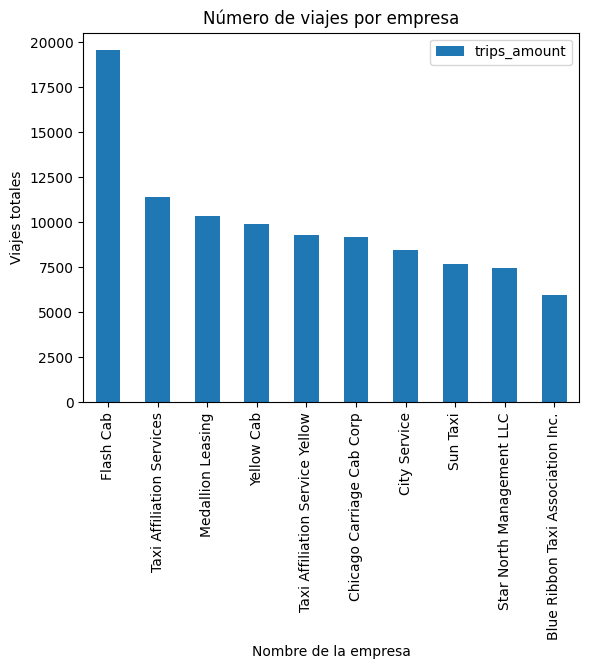


                         company_name  trips_amount
45                          Flash Cab         19558
61          Taxi Affiliation Services         11422
50                  Medallion Leasing         10367
63                         Yellow Cab          9888
60    Taxi Affiliation Service Yellow          9299
36          Chicago Carriage Cab Corp          9181
43                       City Service          8448
59                           Sun Taxi          7701
58          Star North Management LLC          7455
33  Blue Ribbon Taxi Association Inc.          5953


In [11]:
df_top10 = df.groupby(['company_name'])['trips_amount'].sum().reset_index() 
df_top10 = df_top10.sort_values(by='trips_amount', ascending=False)
df_top10 = pd.DataFrame(df_top10)
df_top10.head(10).plot(x='company_name', y='trips_amount', kind='bar')
mplt.title('Número de viajes por empresa')
mplt.xlabel('Nombre de la empresa')
mplt.ylabel('Viajes totales')
mplt.xticks(rotation=90)
mplt.show()

print()

top_10_companies = df.groupby(['company_name'])['trips_amount'].sum().reset_index() 
top_10_companies = top_10_companies.sort_values(by='trips_amount', ascending=False)
print(top_10_companies.head(10))

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de la gráfica para visualizar los resultados. Solamente dado que al cliente le interesa el top 10 de las principales empresas con número de viajes, te recomiendo complementar este análisis con una gráfica solamente mostrando el top 10.

    Bien hecho!</div>

## Barrio con más viajes finalizados dentro de la plataforma. (gráfico)

Para este ejercicio primero vamos a seleccionar el top 10 de nuestro dataframe creado previamente 'top_10_dropoff'.
Con esta información vamos a generar un gráfico de barras presentando la mayor fluencia.

In [12]:
top_10_dropoff = top_10_dropoff.head(10)

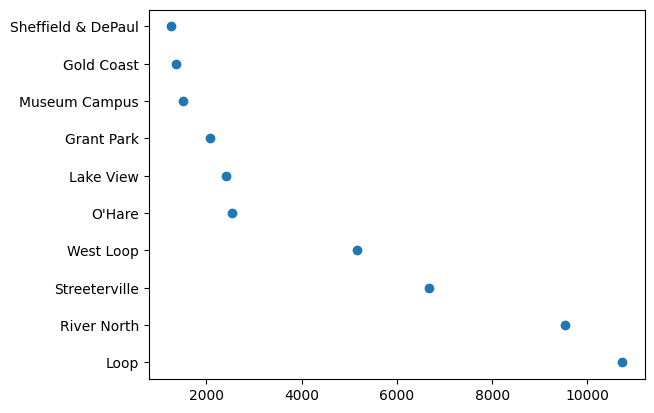

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x=top_10_dropoff['average_trips'], y=top_10_dropoff['dropoff_location_name'])
plt.show()

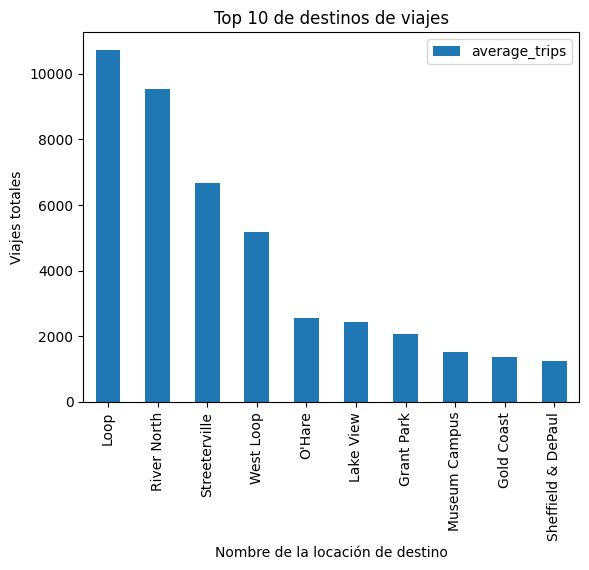

In [14]:
top_10_drop_graph = pd.DataFrame(top_10_dropoff, columns=['dropoff_location_name','average_trips'])
top_10_drop_graph.plot(x='dropoff_location_name', y='average_trips', kind='bar')
mplt.title('Top 10 de destinos de viajes')
mplt.xlabel('Nombre de la locación de destino')
mplt.ylabel('Viajes totales')
mplt.xticks(rotation=90)
mplt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

## Conclusiones Gráficos

1) Las empresas ya constituidas tienen más fiabilidad y una mayor parte de los viajes agendados por los usuarios de Zuber.
2) Los choferes que trabajan de manera independiente consiguen menos viajes a comparación de la empresas dentro de Zuber.
3) Los destinos  más populares se muestran en la gráfica anterior, teniendo a Loop donde más terminan viajes de los usuarios.

## Prueba de Hipótesis

Queremos probar si la deducción;"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos". Es verdadera o no, para esto pondremos a prueba dos hipótesis:

A) Hipótesis nula: no hay cambios en la duración promedio de los viajes de Loop hacia O'Hare.

B) Hipótesis alternnativa: la duración promedio de los viajes incrementa los días sábados lluviosos.

-> Para esto queremos tenes una fiabilidad del 95% por esta razón nuestro alpha será del 5%.


Primero, vamos a utilizar el días del viaje para poder agrupar los viajes por sábados.
Luego queremos filtrar los datos a que sean viajes de Loop a O'Hare.

Finalmente, vamos a agrupar por días lluviosos usando la columna de condición climática.
Aqui podemos crear data frames para comparar que contenga los días lluviosos y otro que contenga los días sin lluvia.
Con estos dataframes podemos hacer la comparcación de que tanto puede llegar la duraciión del viaje si las condiciones de viajes son malas.


In [15]:
from scipy import stats as st #Importamos librería para hacer cáculos de probabilidad

In [33]:
df_3['day_of_week'] = df_3['start_ts'].dt.weekday #Agregamos una nueva columna para día de la semana

print(df_3['day_of_week'].unique()) #Confirmamos datos únicos en la nueva columna, al parecer la base de datos contiene información de sábados sólamente

[5]


In [43]:
rainy = ['Bad'] #Creamos filtro
df_3_rainy = df_3[df_3['weather_conditions'].isin(rainy)][['weather_conditions','duration_seconds']] #Filtramos información de mal clima
print(df_3_rainy['weather_conditions'].unique()) #Validamos que la info sea de malas condiciones de lluvia
print(df_3_rainy['weather_conditions'].count())#Contamos cantidad de datos disponibles
print(df_3_rainy.head(30)) #Revisamos como se ve muestra de la tabla

['Bad']
148
    weather_conditions  duration_seconds
6                  Bad            2969.0
30                 Bad            1980.0
34                 Bad            2460.0
51                 Bad            2760.0
52                 Bad            2460.0
54                 Bad            1440.0
65                 Bad            2363.0
70                 Bad            3000.0
78                 Bad            3120.0
92                 Bad            1511.0
102                Bad            1980.0
107                Bad            1320.0
110                Bad            4044.0
113                Bad            2782.0
134                Bad            3024.0
137                Bad            3300.0
147                Bad            3180.0
155                Bad            2055.0
164                Bad            1260.0
165                Bad            2940.0
166                Bad            2340.0
167                Bad            2220.0
176                Bad            3130.0
178 

In [57]:
sunny = ['Good'] #Creamos filtro
df_3_sunny = df_3[df_3['weather_conditions'].isin(sunny)][['weather_conditions','duration_seconds']] #Filtramos información de buen clima
print(df_3_sunny['weather_conditions'].unique()) #Validamos que la info sea de buenas condiciones de lluvia
print(df_3_sunny['weather_conditions'].count()) #Contamos con la cantidad de datos disponibles

df_3_sunny = df_3_sunny.sample(148) #Equilibramos la tabla a la cantidad de días lluviosos para tener dos poblaciones con la misma cantidad de datos

print(df_3_sunny.head(30)) #Revisamos que la info se escoga al azar para la consulta.

['Good']
723
     weather_conditions  duration_seconds
13                 Good            1546.0
244                Good            1123.0
171                Good            1140.0
313                Good            1530.0
12                 Good            1470.0
482                Good            3000.0
162                Good            1162.0
419                Good            1541.0
98                 Good            2999.0
768                Good            2310.0
883                Good            1690.0
595                Good            3420.0
35                 Good            1620.0
1056               Good            3275.0
414                Good            1336.0
815                Good            2880.0
522                Good            1513.0
404                Good            1961.0
515                Good            1362.0
917                Good            1568.0
208                Good            2160.0
106                Good            1380.0
774                Go

In [54]:
print(df_3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
 3   day_of_week         871 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 34.0+ KB
None


In [64]:
rainy_list = df_3_rainy['duration_seconds'].tolist() #Transformamos nuestras columnas en listas para la prueba.
sunny_list = df_3_sunny['duration_seconds'].tolist() #Usamos nuestras tablas que fueron filtradas con la info que buscamos.
rainy_len = len(rainy_list) #Nos aseguramos de trabajar con una lista con la misma cantidad de datos.
sunny_len = len(sunny_list)
print(rainy_len)
print(sunny_len)

148
148


In [67]:
from scipy import stats as st
import numpy as np

alpha = 0.05

resultados = st.ttest_ind(rainy_list, sunny_list, equal_var=False) # Hacemos una prueba de igualdad de la media de dos poblaciones.

p_value = resultados.pvalue

if (p_value < alpha):
    print('Rechazamos la hipótesis nula: la duración de los viajes en sábados lluviosos cambia a comparación de un sábado con buen clima.')
else:
    print('Aceptamos la hipótesis nula: no existe cambio en la duración de los viajes sin importar las lluvias ')
    
print('El valor de P es:', p_value)

Rechazamos la hipótesis nula: la duración de los viajes en sábados lluviosos cambia a comparación de un sábado con buen clima.
El valor de P es: 5.635587703951289e-08


## Conclusion hipótesis

Los sábados lluviosos los viajes tienden a durar más que los días no lluviosos.
Esto afecta el tiempo de recorrido de los pasajeros que van de Loop a O'Hare.

 <div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo! Ya solamente es necesario desarrollar la prueba de hipótesis para saber si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"
    
    Implementación perfecta de la prueba de hipotesis mediante el cálculo del p value en compración con alpha! Excelente!
</div>